In [111]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data= "data/clinicaltrial_data.csv"


# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data=pd.read_csv(mouse_drug_data)
clinical_data=pd.read_csv(clinical_trial_data)

# Combine the data into a single dataset
bigdata=pd.merge(mouse_data,clinical_data, how='inner', on="Mouse ID")

# Display the data table for preview

bigdata.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [112]:
bigdata.columns

Index(['Mouse ID', 'Drug', 'Timepoint', 'Tumor Volume (mm3)',
       'Metastatic Sites'],
      dtype='object')

## Tumor Response to Treatment

In [113]:
Tumor_Vol_response_means = bigdata.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()
Tumor_Vol_response_means = Tumor_Vol_response_means.reset_index()
Tumor_Vol_response_means.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [114]:
means1 = pd.pivot_table(Tumor_Vol_response_means, 'Tumor Volume (mm3)', 'Timepoint', 'Drug')
means1.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [115]:
Tumor_Vol_response_sems = bigdata.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()
Tumor_Vol_response_sems = Tumor_Vol_response_sems.reset_index()
Tumor_Vol_response_sems.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [116]:
sems1= pd.pivot_table(Tumor_Vol_response_sems, 'Tumor Volume (mm3)', 'Timepoint', 'Drug')
sems1.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [117]:
means1.columns

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

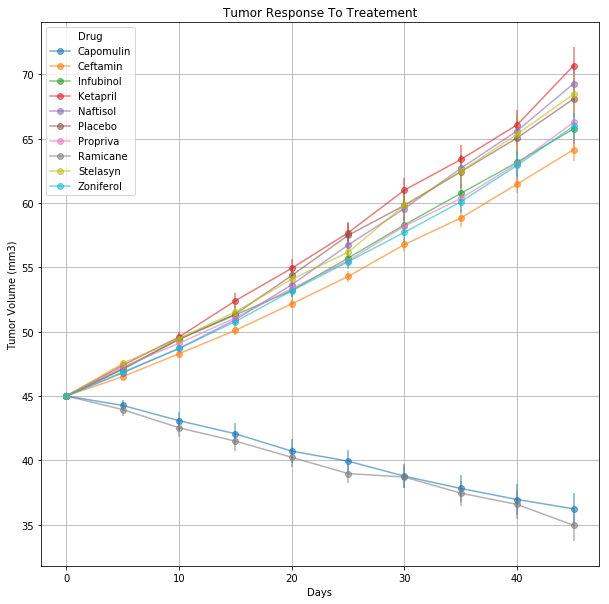

In [118]:
means1.plot(kind='line', figsize=(10,10), marker='o', alpha=.6, yerr=sems1)

 

plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Days')
plt.title('Tumor Response To Treatement')

plt.grid()

plt.show()

In [65]:
# Show the Figure
plt.show()

In [66]:
Metastic_response_means = bigdata.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()
Metastic_response_means = Metastic_response_means.reset_index()
Metastic_response_means.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


## Metastatic Response to Treatment

In [67]:
means2 = pd.pivot_table(Metastic_response_means, 'Metastatic Sites', 'Timepoint', 'Drug')
means2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [68]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

Metastic_response_sems = bigdata.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()
Metastic_response_sems = Metastic_response_sems.reset_index()
Metastic_response_sems.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [69]:
sems2 = pd.pivot_table(Metastic_response_sems, 'Metastatic Sites', 'Timepoint', 'Drug')
sems2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


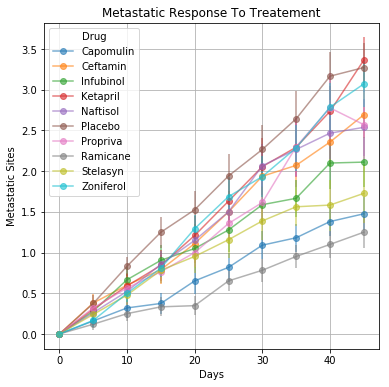

In [70]:
means2.plot(kind='line', figsize=(6,6), marker='o', alpha=.6, yerr=sems2)

#this not plt 

plt.ylabel('Metastatic Sites')
plt.xlabel('Days')
plt.title('Metastatic Response To Treatement')

plt.grid()
plt.show()

In [71]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

## Survival Rates

In [72]:
len('Mouse Id')

8

In [73]:
mousecount=bigdata['Mouse ID'].count()
mousecount

1906

In [74]:
MiceCount=bigdata[["Mouse ID","Drug"]].count()
MiceCount.head()

Mouse ID    1906
Drug        1906
dtype: int64

In [75]:
mousegroup = bigdata.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()
mousegroup.head()


Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
Name: Mouse ID, dtype: int64

In [76]:
mousegroup= mousegroup.unstack(level= 0)
mousegroup.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


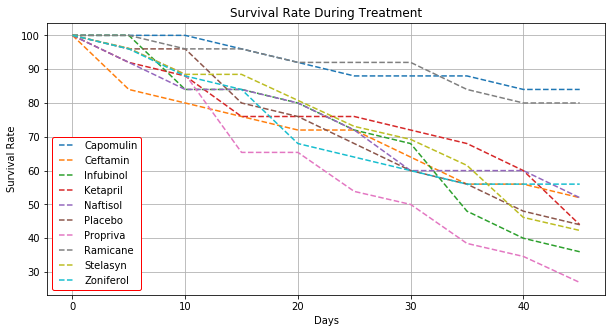

In [108]:

plt.figure(figsize = (10,5))
plt.title('Survival Rate During Treatment')
plt.xlabel('Days')
plt.ylabel('Survival Rate')


x_axis = mousegroup.index #timepoints



for x in mousegroup:
    y_axis = mousegroup[x]/mousegroup.loc[0,x] * 100 #calculates survival rate for each timepoint
    plt.plot(x_axis, 
             y_axis, 
             linestyle = '--', 
             
             )
 
 #legend 
lg = plt.legend(numpoints = 2, 
                frameon = True, 
                markerscale = 1.5, 
                edgecolor = 'red', 
                fontsize = '10', 
                framealpha = 1)
plt.grid()
plt.show()

 


## Summary Bar Graph

In [84]:
# Calculate the percent changes for each drug

# Display the data to confirm
#calculates tumor change for each drug
tumor_change= (means1.loc[45, :] - means1.loc[0, :])/means1.loc[0, :] * 100
tumor_change

TypeError: cannot do label indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [45] of <class 'int'>

In [ ]:
# I couldnt do rest.

In [ ]:
#Analysis

# The most effective drugs in terms of decreasing tumor volume, limiting metastatic spread are Ramicane and Capomulin.
# Mice treated with Infubinol had less tumor growth and metastatic site spread than those treated with Ketapril or Placebo.
#Propriva is least effective drug in terms of surviving.